In [1]:
# Import python library
import numpy as np
import mne
import matplotlib.pyplot as plt
import os
%matplotlib notebook

In [2]:
folder = 'C:\\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data'

filepath1=os.path.join(folder,'SSVEP1.dat')
filepath2=os.path.join(folder,'SSVEP2.dat')
filepath3=os.path.join(folder,'SSVEP3.dat')
filepath4=os.path.join(folder,'SSVEP4.dat')
filepath5=os.path.join(folder,'SSVEP5.dat')
filepath6=os.path.join(folder,'SSVEP6.dat')

In [3]:
raw1=mne.io.read_raw_curry(filepath1)
raw2=mne.io.read_raw_curry(filepath2)
raw3=mne.io.read_raw_curry(filepath3)
raw4=mne.io.read_raw_curry(filepath4)
raw5=mne.io.read_raw_curry(filepath5)
raw6=mne.io.read_raw_curry(filepath6)

Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP1.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP2.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP3.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP4.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP5.ceo...
Leaving device<->head tra

In [4]:
#pick only eeg
raw1.pick_types(eeg=True)
raw2.pick_types(eeg=True)
raw3.pick_types(eeg=True)
raw4.pick_types(eeg=True)
raw5.pick_types(eeg=True)
raw6.pick_types(eeg=True)

<RawCurry | SSVEP6.dat, 122 x 437500 (437.5 s), ~116 kB, data not loaded>

In [5]:
#apply BP filter and nouch filter
raw1.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw1.filter(l_freq=0.1,h_freq=None,method='iir')

raw2.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw2.filter(l_freq=0.1,h_freq=None,method='iir')

raw3.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw3.filter(l_freq=0.1,h_freq=None,method='iir')

raw4.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw4.filter(l_freq=0.1,h_freq=None,method='iir')

raw5.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw5.filter(l_freq=0.1,h_freq=None,method='iir')

raw6.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw6.filter(l_freq=0.1,h_freq=None,method='iir')

Reading 0 ... 458499  =      0.000 ...   458.499 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Reading 0 ... 425699  =      0.000 ...   425.699 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Reading 0 ... 458499  =      0.000 ...   458.499 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after fo

<RawCurry | SSVEP6.dat, 122 x 437500 (437.5 s), ~407.3 MB, data loaded>

In [6]:
# Annotation Function
#define duration each events
def find_net_annotation(raw_filted):
    raw=raw_filted
    for ann in range(17):
        raw_filted.annotations.duration[ann]=raw.annotations[ann+1]['onset']-raw.annotations[ann]['onset']
    # delete no need annotation 
    raw_filted.annotations.delete(np.arange(1,len(raw.annotations),2))
    raw_filted.annotations.onset
    #segmentation function
    def segment_eeg_data(start=None,end=None,duration=None,description=None):
        onset=list(np.arange(round(start),round(end),duration))
        return onset,[duration for j in range(len(onset))],[description for i in range(len(onset))]
    
    #declare variable
    onset=raw_filted.annotations.onset
    duration=raw_filted.annotations.duration
    labels=raw_filted.annotations.description
    end=np.round(onset+duration)
    onset_new=[]
    duration_new=[]
    descrip_new=[]
    for on,end,labs in zip(onset,end,labels):
        s,d,p=segment_eeg_data(start=on,end=end,duration=1,description=labs)
        onset_new.append(s)
        duration_new.append(d)
        descrip_new.append(p)
        
    #reshape data
    onset=[]
    duration=[]
    labels=[]
    for re in np.arange(len(onset_new)):
        onset=onset+onset_new[re]
        duration=duration+duration_new[re]
        labels=labels+descrip_new[re]
        
    #create annotation
    my_annot = mne.Annotations(onset=onset,  # in seconds
                               duration=duration,  # in seconds, too
                               description=labels)
    
    #Delete all old annotation
    raw_filted.annotations.delete(np.arange(0,len(raw_filted.annotations),1))
    
    #Set new annotation
    raw_filted.set_annotations(my_annot)
    return raw_filted

In [7]:
raw1=find_net_annotation(raw1.copy())
raw2=find_net_annotation(raw2.copy())
raw3=find_net_annotation(raw2.copy())
raw4=find_net_annotation(raw2.copy())
raw5=find_net_annotation(raw2.copy())
raw6=find_net_annotation(raw2.copy())

## Epoch process 

In [8]:
event1,_id1=mne.events_from_annotations(raw1)
event2,_id2=mne.events_from_annotations(raw2)
event3,_id3=mne.events_from_annotations(raw3)
event4,_id4=mne.events_from_annotations(raw4)
event5,_id5=mne.events_from_annotations(raw5)
event6,_id6=mne.events_from_annotations(raw6)

Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']


In [9]:
pick_chs=[
 'PO11',
 'PO9',
 'PPO7',
 'PO3',
 'POO7',
 'OI1',
 'POO3',
 'Oz',
 'OI2',
 'POO4',
 'PO2',
 'PPO2',
 'POO8',
 'POO10h',
 'POO12h',
 'PO12',
 'PO10',
 'PPO8']

In [10]:
len(pick_chs)

18

In [11]:
event_id={'10Hz':1,
          '20Hz':2,
          '30Hz':3
}

In [12]:
epochs1=mne.Epochs(raw1,event1,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs2=mne.Epochs(raw2,event2,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs3=mne.Epochs(raw3,event3,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs4=mne.Epochs(raw4,event4,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs5=mne.Epochs(raw5,event5,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs6=mne.Epochs(raw6,event6,event_id,tmin=-0.1,tmax=1,picks=pick_chs)

del raw1,raw2,raw3,raw4,raw5,raw6

Not setting metadata
Not setting metadata
273 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
272 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting base

In [13]:
epochs1.load_data().filter(l_freq=4,h_freq=40,method='iir')
epochs2.load_data().filter(l_freq=4,h_freq=40,method='iir')
epochs3.load_data().filter(l_freq=4,h_freq=40,method='iir')
epochs4.load_data().filter(l_freq=4,h_freq=40,method='iir')
epochs5.load_data().filter(l_freq=4,h_freq=40,method='iir')
epochs6.load_data().filter(l_freq=4,h_freq=40,method='iir')

Loading data for 273 events and 1101 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Loading data for 272 events and 1101 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Loading data for 136 events and 1101 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forwa

Number of events,136
Events,10Hz: 4620Hz: 4530Hz: 45
Time range,-0.100 – 1.000 sec
Baseline,-0.100 – 0.000 sec


In [14]:
epochs1.set_eeg_reference(ref_channels='average',verbose=False)
epochs2.set_eeg_reference(ref_channels='average',verbose=False)
epochs3.set_eeg_reference(ref_channels='average',verbose=False)
epochs4.set_eeg_reference(ref_channels='average',verbose=False)
epochs5.set_eeg_reference(ref_channels='average',verbose=False)
epochs6.set_eeg_reference(ref_channels='average',verbose=False)

Number of events,136
Events,10Hz: 4620Hz: 4530Hz: 45
Time range,-0.100 – 1.000 sec
Baseline,-0.100 – 0.000 sec


## Preprocess data 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
## mne decoding library
from mne.decoding import Vectorizer,cross_val_multiscore,get_coef,Scaler

In [16]:
X1=epochs1.get_data()
X2=epochs2.get_data()
X3=epochs3.get_data()
X4=epochs4.get_data()
X5=epochs5.get_data()
X6=epochs6.get_data()

y1=epochs1.events[:,-1]
y2=epochs2.events[:,-1]
y3=epochs3.events[:,-1]
y4=epochs4.events[:,-1]
y5=epochs5.events[:,-1]
y6=epochs6.events[:,-1]

del epochs2,epochs3,epochs6,epochs4,epochs5,

In [17]:
X=np.concatenate((X1,X2,X3,X4,X5,X6),axis=0)
y=np.concatenate((y1,y2,y3,y4,y5,y6),axis=0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
scaler=Scaler(epochs1.info)
scaler.fit(X_train,X_train.shape[0])
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

del epochs1

##  EEGnet algorithm

In [20]:
from EEGModels import EEGNet,EEGnet_MindAmpltd
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils as np_utils

In [21]:
kernels,chans,samples=1,X.shape[1],X.shape[2]

In [22]:
class_weigths={0:1, 1:1, 2:1, 3:1}

In [23]:
yc_train = np_utils.to_categorical(y_train-1)
yc_test = np_utils.to_categorical(y_test-1)

In [24]:
#reshape X
Xc_train=X_train.reshape(X_train.shape[0],chans,samples,kernels)
Xc_test=X_test.reshape(X_test.shape[0],chans,samples,kernels)

In [25]:
# model=EEGNet(nb_classes=3,Chans=chans,Samples=samples,dropoutRate=0.5,
#             kernLength=500,F1=8,D=2,F2=16,dropoutType='Dropout')

model=EEGnet_MindAmpltd(nb_classes=3,Chans=chans,Samples=samples,
                        dropoutRate=0.75,norm_rate=0.3,kernLength=250,F1=25,D=2,F2=50,dropoutType='Dropout')

In [26]:
#model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics='accuracy')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [27]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18, 1101, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 18, 1101, 25)      6250      
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 1101, 25)      100       
_________________________________________________________________
activation (Activation)      (None, 18, 1101, 25)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 1, 1101, 50)       900       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1101, 50)       200       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1101, 50)      

In [28]:
numParams=model.count_params()

In [29]:
checkpointer=ModelCheckpoint(filepath='Arthit Learn to Analysis EEG.h5',verbose=True,save_best_only=True)

In [30]:
fittedmodel=model.fit(Xc_train,yc_train,batch_size=32,epochs=100,verbose=True,
                      validation_split=0.25,callbacks=[checkpointer],class_weight=class_weigths)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1840 - accuracy: 0.3644
Epoch 00001: val_loss improved from inf to 1.09414, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 720ms/step - loss: 1.1840 - accuracy: 0.3644 - val_loss: 1.0941 - val_accuracy: 0.4020
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.0852 - accuracy: 0.4134
Epoch 00002: val_loss improved from 1.09414 to 1.08892, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 700ms/step - loss: 1.0852 - accuracy: 0.4134 - val_loss: 1.0889 - val_accuracy: 0.4265
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 1.0574 - accuracy: 0.4542
Epoch 00003: val_loss improved from 1.08892 to 1.07362, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 691ms/step - loss: 1.0574 - accuracy: 0.4542 - val_loss: 1.0736 - val_accuracy: 0.4804
Epoch 4/100

Epoch 26/100
20/20 [==============================] - ETA: 0s - loss: 0.4398 - accuracy: 0.8235
Epoch 00026: val_loss improved from 0.42115 to 0.40329, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 704ms/step - loss: 0.4398 - accuracy: 0.8235 - val_loss: 0.4033 - val_accuracy: 0.8578
Epoch 27/100
20/20 [==============================] - ETA: 0s - loss: 0.3968 - accuracy: 0.8497
Epoch 00027: val_loss improved from 0.40329 to 0.38953, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 699ms/step - loss: 0.3968 - accuracy: 0.8497 - val_loss: 0.3895 - val_accuracy: 0.8725
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8301
Epoch 00028: val_loss improved from 0.38953 to 0.36140, saving model to Arthit Learn to Analysis EEG.h5
20/20 [==============================] - 14s 690ms/step - loss: 0.4270 - accuracy: 0.8301 - val_loss: 0.3614 - val_accuracy: 0.8627
Epoc

Epoch 81/100
20/20 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9657
Epoch 00081: val_loss did not improve from 0.15071
20/20 [==============================] - 14s 687ms/step - loss: 0.1309 - accuracy: 0.9657 - val_loss: 0.1628 - val_accuracy: 0.9510
Epoch 82/100
20/20 [==============================] - ETA: 0s - loss: 0.2061 - accuracy: 0.9216
Epoch 00082: val_loss did not improve from 0.15071
20/20 [==============================] - 14s 688ms/step - loss: 0.2061 - accuracy: 0.9216 - val_loss: 0.1551 - val_accuracy: 0.9706
Epoch 83/100
20/20 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9477
Epoch 00083: val_loss did not improve from 0.15071
20/20 [==============================] - 14s 681ms/step - loss: 0.1568 - accuracy: 0.9477 - val_loss: 0.1641 - val_accuracy: 0.9314
Epoch 84/100
20/20 [==============================] - ETA: 0s - loss: 0.1643 - accuracy: 0.9363
Epoch 00084: val_loss did not improve from 0.15071
20/20 [=========

In [31]:
model.load_weights('Arthit Learn to Analysis EEG.h5')

In [32]:
probs=model.predict(Xc_test)
preds=probs.argmax(axis=-1)
acc=np.mean(preds==yc_test.argmax(axis=-1))

In [33]:
acc

0.8901098901098901

In [34]:
preds=preds+1

In [35]:
preds

array([2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2,
       2, 1, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3, 1,
       2, 3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1, 2,
       2, 1, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 1,
       3, 1, 2, 2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 3, 3,
       3, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1,
       2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 2, 2, 3,
       1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 3,
       3, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 1, 3, 2, 1, 3, 1, 3,
       3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 1,
       3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 2, 3, 2,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3,
       2, 3, 1, 2, 2, 2, 3, 1, 3], dtype=int64)

In [36]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[ 74   4   6]
 [  0  68  15]
 [  0   5 101]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        84
           2       0.88      0.82      0.85        83
           3       0.83      0.95      0.89       106

    accuracy                           0.89       273
   macro avg       0.90      0.88      0.89       273
weighted avg       0.90      0.89      0.89       273



In [37]:
preds

array([2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2,
       2, 1, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 1, 1, 2, 2, 2, 1, 3, 3, 3, 1,
       2, 3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 3, 3, 1, 2,
       2, 1, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 1,
       3, 1, 2, 2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 3, 3,
       3, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1,
       2, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 2, 2, 3,
       1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 3,
       3, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 1, 3, 2, 1, 3, 1, 3,
       3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 1,
       3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 2, 3, 2,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3,
       2, 3, 1, 2, 2, 2, 3, 1, 3], dtype=int64)

## plot History

<IPython.core.display.Javascript object>


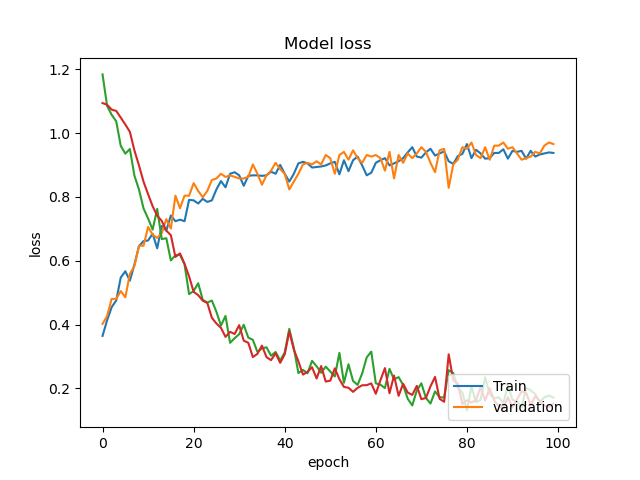

In [38]:
plt.plot(fittedmodel.history['accuracy'])
plt.plot(fittedmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()

In [39]:
#loss
plt.plot(fittedmodel.history['loss'])
plt.plot(fittedmodel.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()

In [40]:
model.save(filepath='6Subject_model.h5',save_format='h5')